# importing libraries

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error, mean_absolute_error 

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# LOADING DATA 

In [43]:
df=pd.read_csv("insurance.csv")

In [44]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [47]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [48]:
print("\n---shape ---")
df.shape


---shape ---


(1338, 7)

In [49]:
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [50]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [51]:
df.duplicated().value_counts()

False    1337
True        1
Name: count, dtype: int64

In [52]:
df.drop_duplicates(inplace=True)

In [53]:
df.size

9359

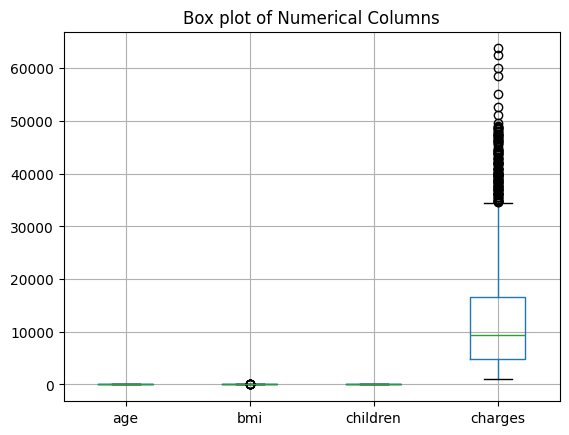

In [54]:
df.boxplot(column=['age', 'bmi', 'children', 'charges']) 
plt.title('Box plot of Numerical Columns')
plt.show()

In [55]:
df_cleaned = df[(df['charges'] < 21000) & (df['bmi'] < 46)]

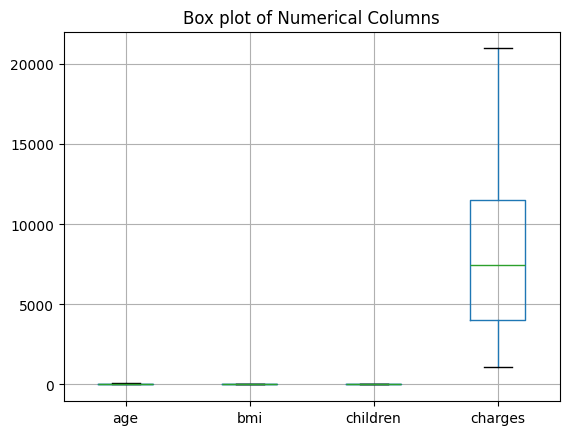

In [56]:
df_cleaned.boxplot(column=['age', 'bmi', 'children', 'charges'])
plt.title('Box plot of Numerical Columns')
plt.show()

In [57]:
df_cleaned.describe()

,age,bmi,children,charges
count,1068.000000,1068.000000,1068.000000,1068.000000
mean,38.371723,30.091910,1.076779,8159.150438
std,13.943164,5.856569,1.221375,4929.643963
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.840000,0.000000,4038.478863
50%,38.000000,29.830000,1.000000,7441.277000
75%,50.000000,33.933750,2.000000,11539.380487
max,64.000000,45.900000,5.000000,20984.093600


  # 📈 Exploratory Data Analysis (EDA)

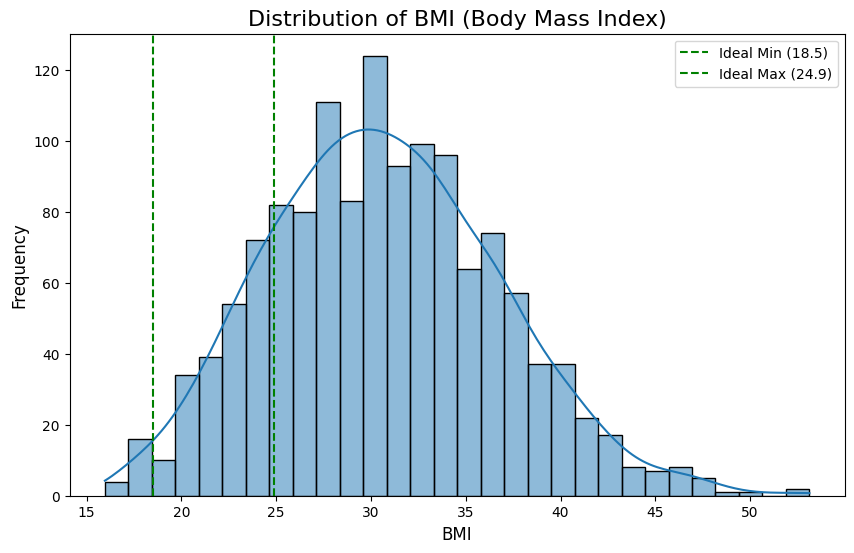

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], kde=True, bins=30)
plt.title('Distribution of BMI (Body Mass Index)', fontsize=16)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Add a line for the "ideal" BMI range
plt.axvline(18.5, color='green', linestyle='--', label='Ideal Min (18.5)')
plt.axvline(24.9, color='green', linestyle='--', label='Ideal Max (24.9)')
plt.legend()
plt.show()

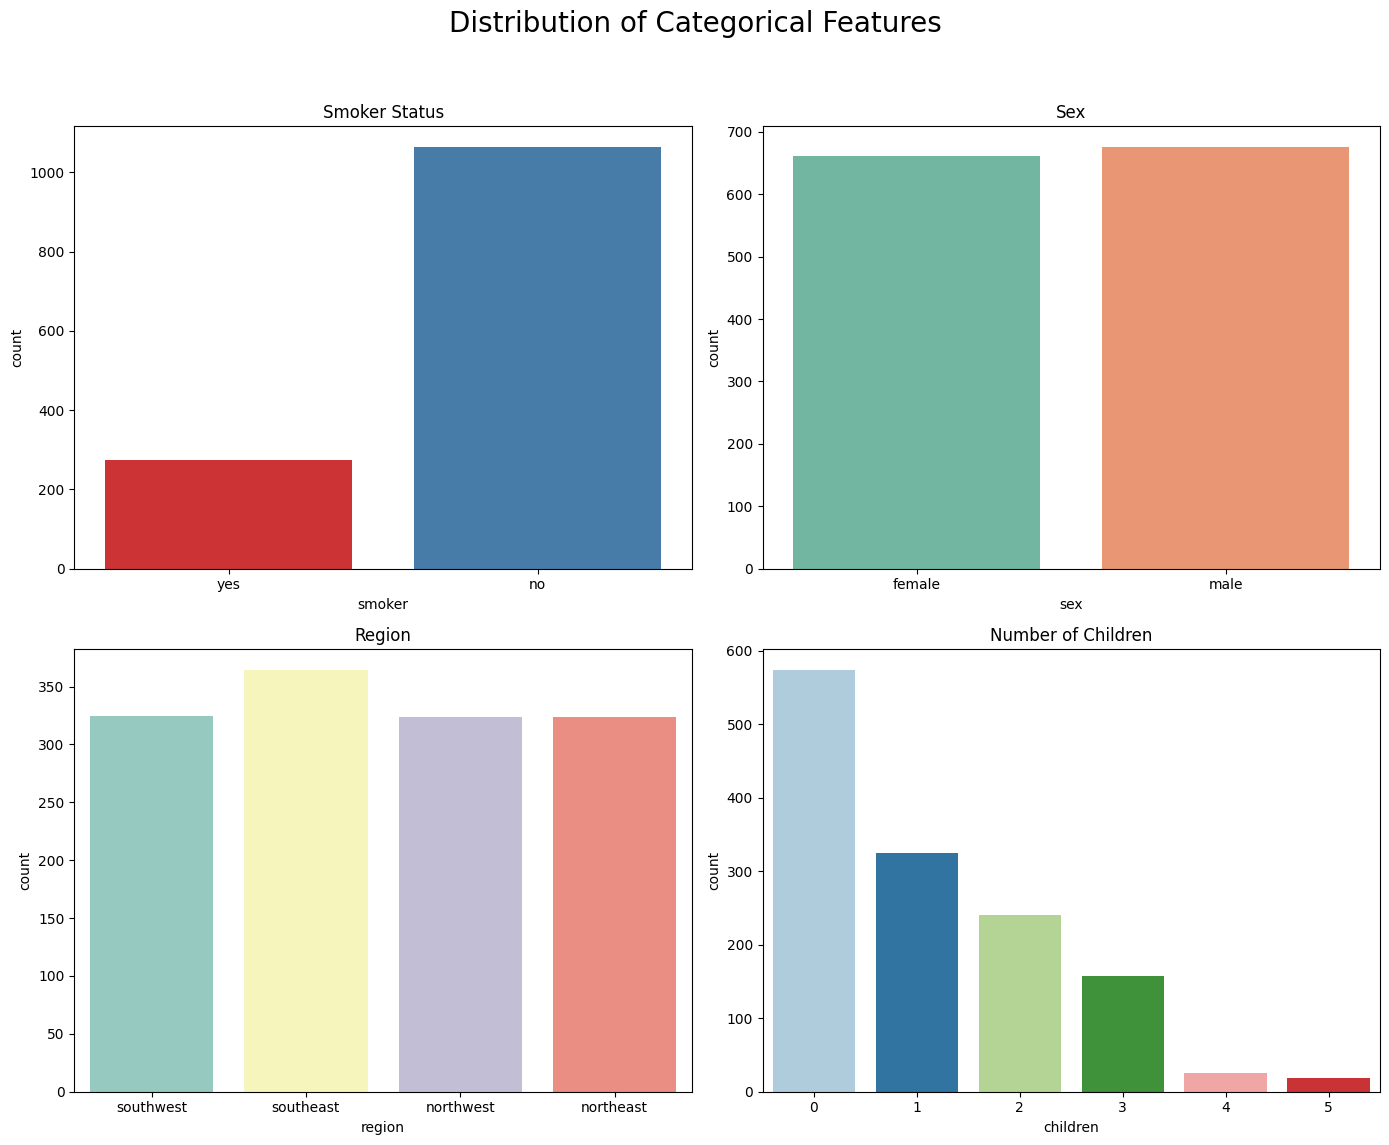

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Distribution of Categorical Features', fontsize=20)

# Smoker
sns.countplot(ax=axes[0, 0], x='smoker', data=df, palette='Set1')
axes[0, 0].set_title('Smoker Status')

# Sex
sns.countplot(ax=axes[0, 1], x='sex', data=df, palette='Set2')
axes[0, 1].set_title('Sex')

# Region
sns.countplot(ax=axes[1, 0], x='region', data=df, palette='Set3')
axes[1, 0].set_title('Region')

# Children (treating as categorical due to few discrete values)
sns.countplot(ax=axes[1, 1], x='children', data=df, palette='Paired')
axes[1, 1].set_title('Number of Children')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

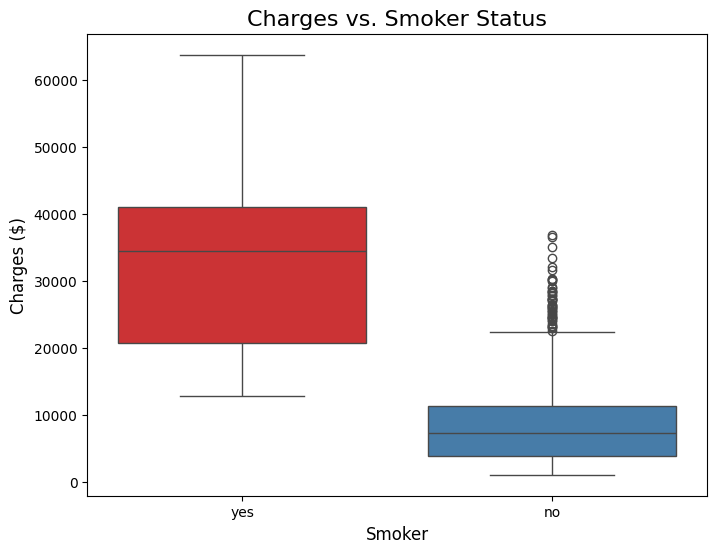

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df, palette='Set1')
plt.title('Charges vs. Smoker Status', fontsize=16)
plt.xlabel('Smoker', fontsize=12)
plt.ylabel('Charges ($)', fontsize=12)
plt.show()

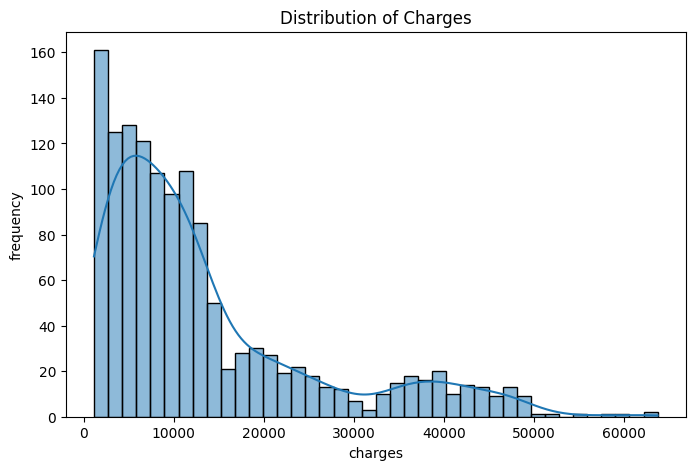

Skewness of charges:In the insurance dataset, charges ≈ 1.5–2.0 skewed, meaning a few customers have very high claims (outliers). 1.52


In [61]:
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], bins=40, kde=True)
plt.title('Distribution of Charges')
plt.xlabel('charges')
plt.ylabel('frequency')
plt.show()

# Check skewness
skewness = df['charges'].skew()
print(f"Skewness of charges:In the insurance dataset, charges ≈ 1.5–2.0 skewed, meaning a few customers have very high claims (outliers). {skewness:.2f}")


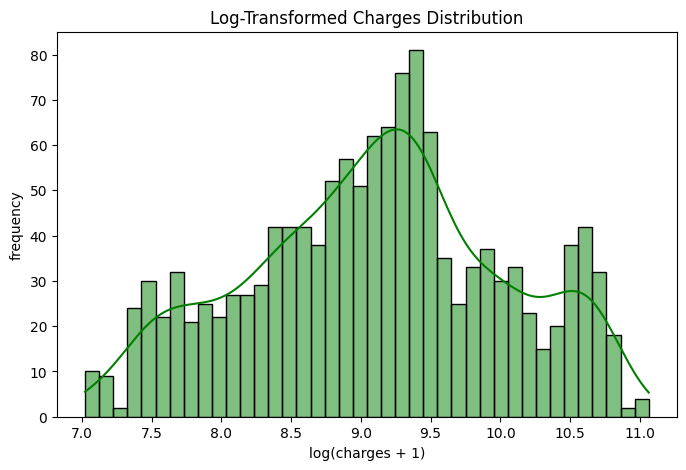

In [62]:
df['log_charges'] = np.log1p(df['charges'])
plt.figure(figsize=(8,5))
sns.histplot(df['log_charges'], bins=40, kde=True, color='green')
plt.title('Log-Transformed Charges Distribution')
plt.xlabel('log(charges + 1)')
plt.ylabel('frequency')
plt.show()

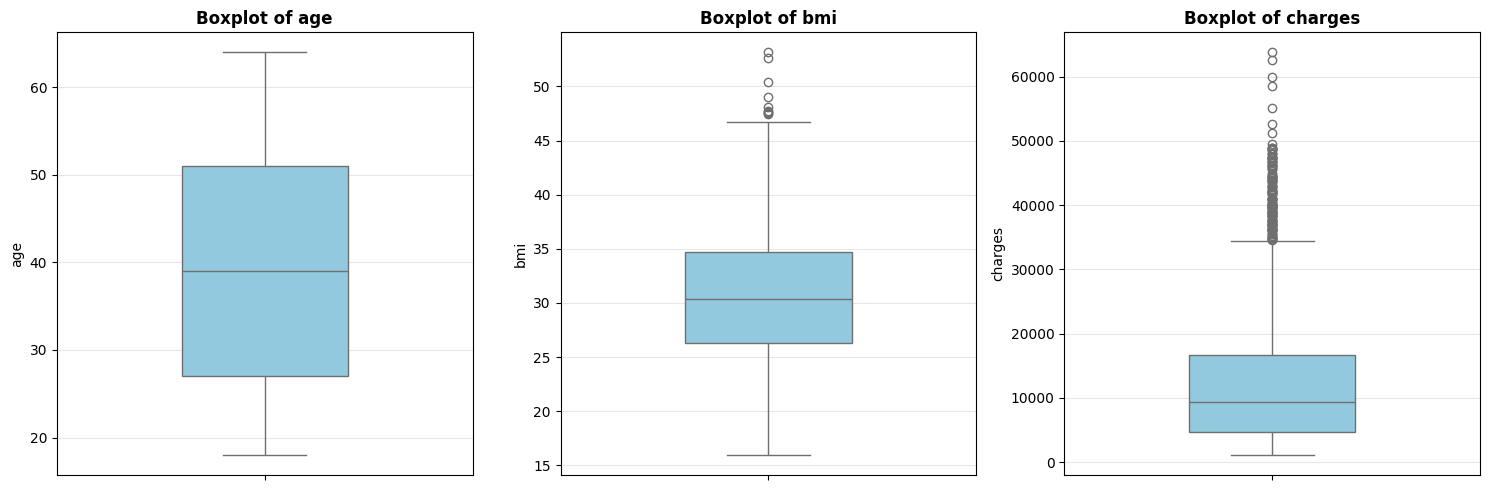

In [63]:
# Visualize numeric columns with individual boxplots
num_cols = ['age', 'bmi', 'charges']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue', width=0.4)
    axes[i].set_title(f'Boxplot of {col}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel(col, fontsize=10)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [64]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outlier_percentage = (len(outliers) / len(data)) * 100
    
    print(f"\n{column}: {len(outliers)} outliers detected ({outlier_percentage:.2f}%)")
    print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    return outliers[[column]]

out_charges = detect_outliers_iqr(df, 'charges')
out_bmi = detect_outliers_iqr(df, 'bmi')
out_age = detect_outliers_iqr(df, 'age')



charges: 139 outliers detected (10.40%)
Lower bound: -13120.72, Upper bound: 34524.78

bmi: 9 outliers detected (0.67%)
Lower bound: 13.67, Upper bound: 47.32

age: 0 outliers detected (0.00%)
Lower bound: -9.00, Upper bound: 87.00


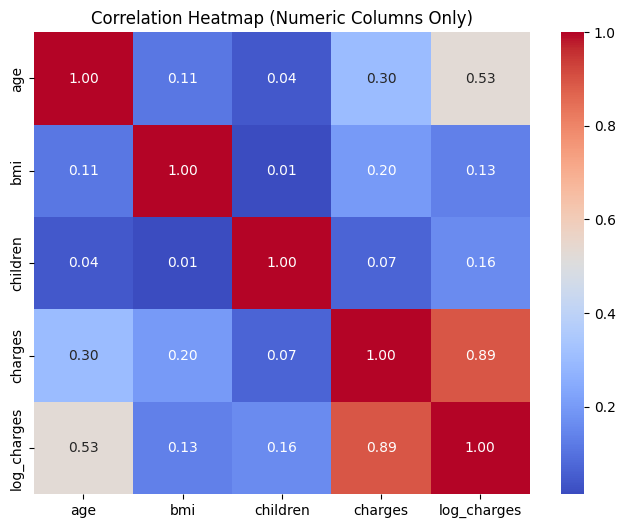

In [65]:
numeric_df = df.select_dtypes(include=['number'])
# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


## oribinal charges   vs log-transformed charges

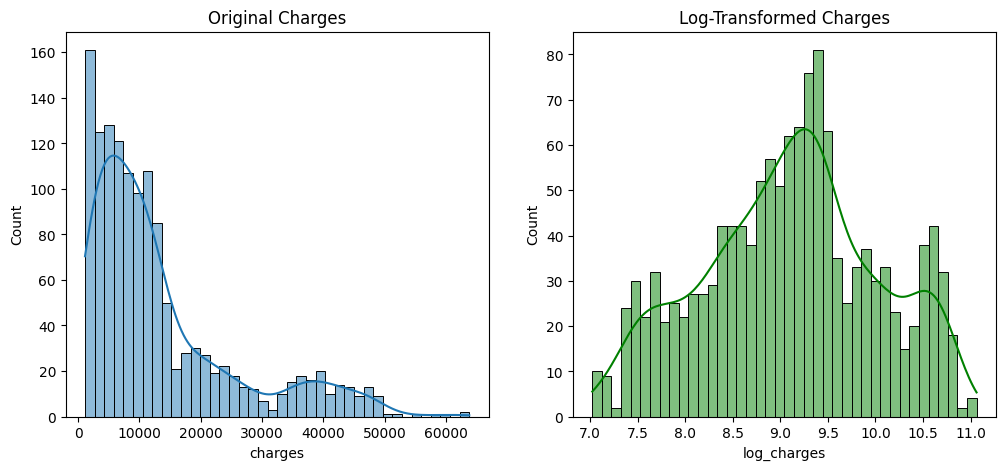

In [66]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(df['charges'], bins=40, kde=True, ax=ax[0])
ax[0].set_title('Original Charges')
sns.histplot(df['log_charges'], bins=40, kde=True, ax=ax[1], color='green')
ax[1].set_title('Log-Transformed Charges')
plt.show()


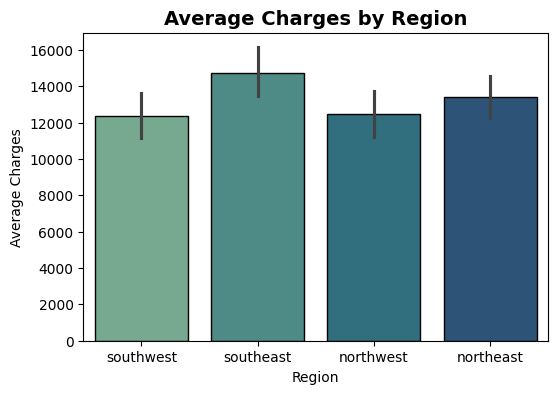

In [67]:
plt.figure(figsize=(6,4))
sns.barplot(x='region', y='charges', data=df, palette='crest', edgecolor='black')
plt.title('Average Charges by Region', fontsize=14, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()

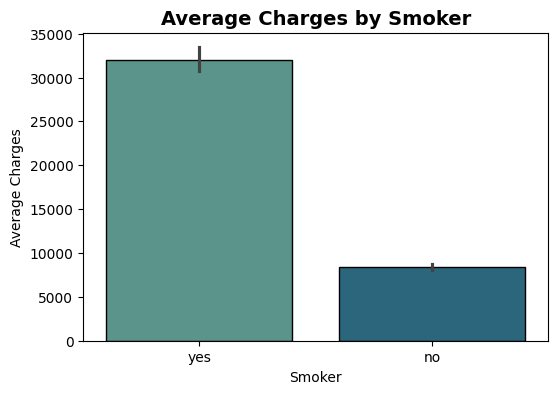

In [68]:
plt.figure(figsize=(6,4))
sns.barplot(x='smoker', y='charges', data=df, palette='crest', edgecolor='black')
plt.title('Average Charges by Smoker', fontsize=14, fontweight='bold')
plt.xlabel('Smoker')
plt.ylabel('Average Charges')
plt.show()

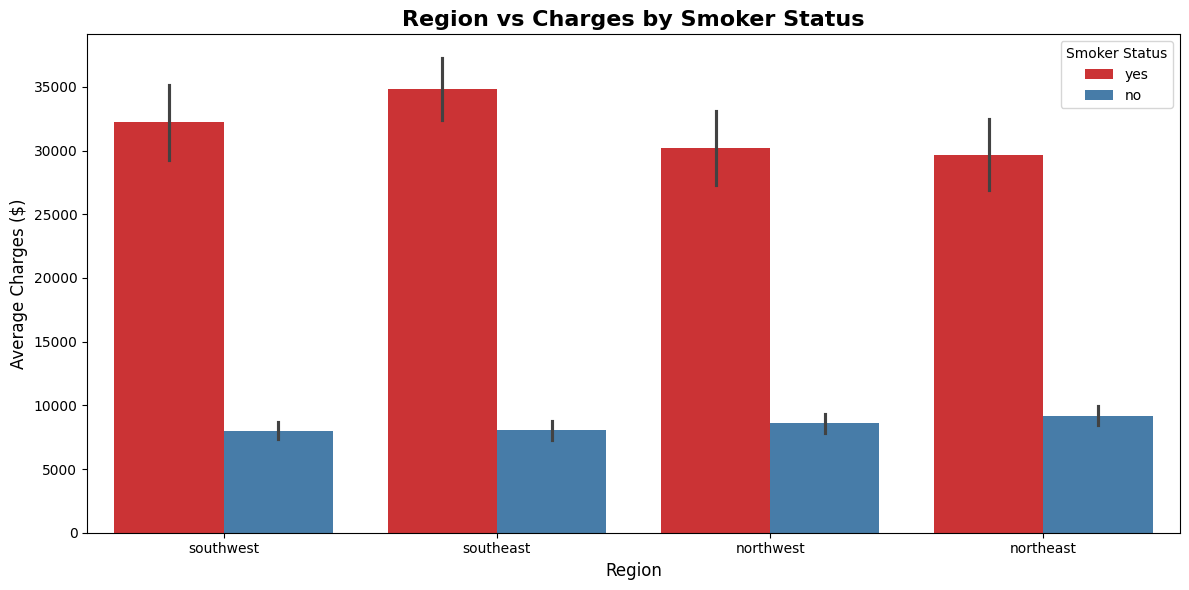

In [69]:
# Region vs Charges by Smoker Status - Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='Set1')

# Set title and labels
plt.title('Region vs Charges by Smoker Status', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Charges ($)', fontsize=12)
plt.legend(title='Smoker Status', fontsize=10)

# Save the plot
plt.savefig('region_smoker_charges_vertical_barplot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

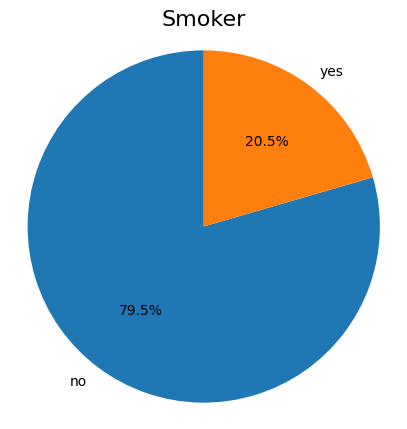

In [70]:
smoker_counts = df['smoker'].value_counts()
    
    # Get the labels ('no', 'yes') and sizes (counts)
labels = smoker_counts.index
sizes = smoker_counts.values

    # Create the pie chart
plt.figure(figsize=(5, 5))
    # 'autopct' adds the percentages, 'startangle' rotates the chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90) 
    
    # Add a title (matching the image)
plt.title('Smoker', fontsize=16)
    
    # Ensure the pie chart is circular
plt.axis('equal') 
    
    # Save the plot (optional)
    # plt.savefig('smoker_pie_chart.png')

    # Show the plot
plt.show()

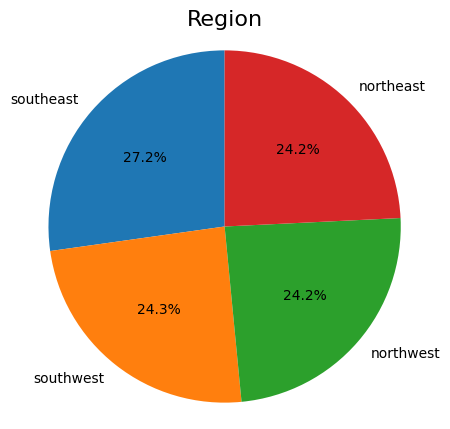

In [71]:
region_counts = df['region'].value_counts()
    
    # Get the labels ('no', 'yes') and sizes (counts)
labels = region_counts.index
sizes = region_counts.values

    # Create the pie chart
plt.figure(figsize=(5, 5))
    # 'autopct' adds the percentages, 'startangle' rotates the chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90) 
    
    # Add a title (matching the image)
plt.title('Region', fontsize=16)
    
    # Ensure the pie chart is circular
plt.axis('equal') 
    
    # Save the plot (optional)
    # plt.savefig('smoker_pie_chart.png')

    # Show the plot
plt.show()

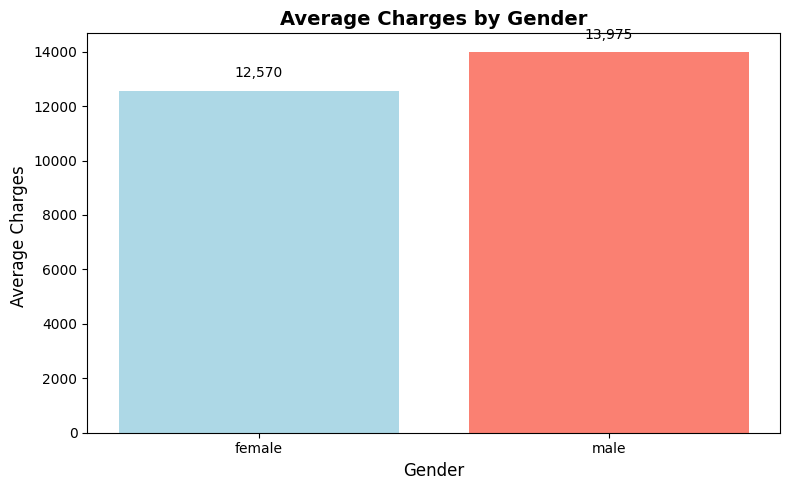

In [72]:
gender_avg = df.groupby('sex')['charges'].mean().sort_values()
plt.figure(figsize=(8, 5))
plt.bar(gender_avg.index, gender_avg.values, color=['lightblue', 'salmon'])
plt.title('Average Charges by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Charges ', fontsize=12)
for i, v in enumerate(gender_avg.values):
    plt.text(i, v + 500, f'{v:,.0f}', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

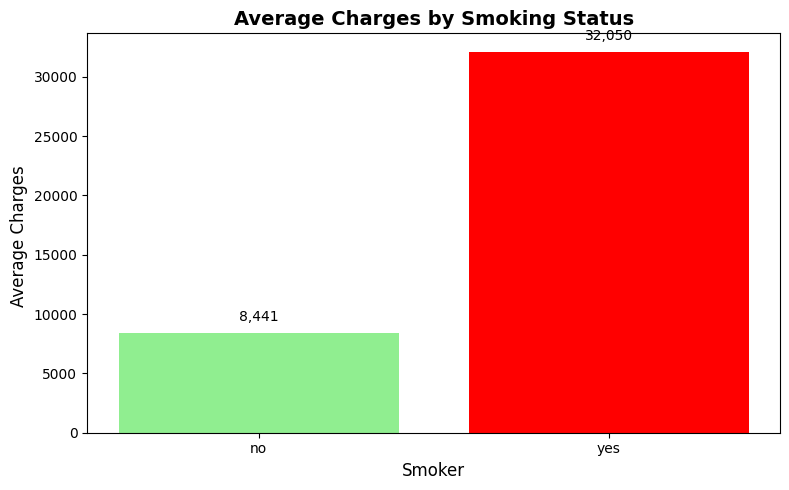

In [73]:
smoker_avg = df.groupby('smoker')['charges'].mean().sort_values()
plt.figure(figsize=(8, 5))
plt.bar(smoker_avg.index, smoker_avg.values, color=['lightgreen', 'red'])
plt.title('Average Charges by Smoking Status', fontsize=14, fontweight='bold')
plt.xlabel('Smoker', fontsize=12)
plt.ylabel('Average Charges ', fontsize=12)
for i, v in enumerate(smoker_avg.values):
    plt.text(i, v + 1000, f'{v:,.0f}', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

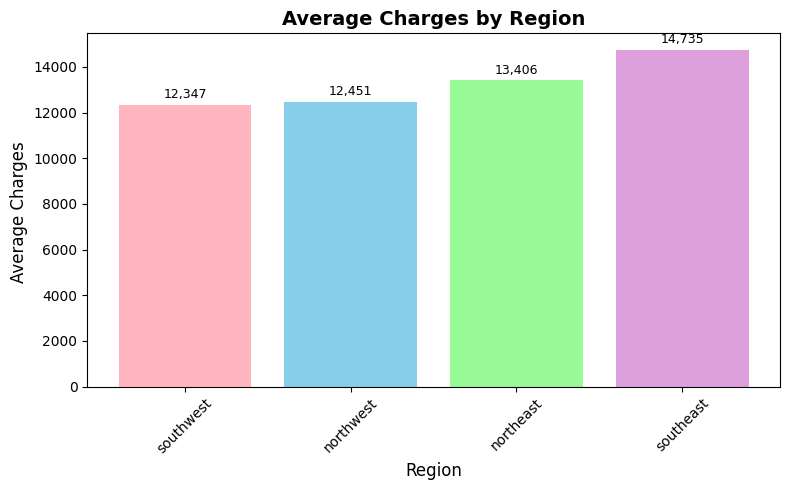

In [74]:
region_avg = df.groupby('region')['charges'].mean().sort_values()
plt.figure(figsize=(8, 5))
plt.bar(region_avg.index, region_avg.values, color=['#FFB6C1', '#87CEEB', '#98FB98', '#DDA0DD'])
plt.title('Average Charges by Region', fontsize=14, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Charges ', fontsize=12)
plt.xticks(rotation=45)
for i, v in enumerate(region_avg.values):
    plt.text(i, v + 300, f'{v:,.0f}', ha='center', fontsize=9)
plt.tight_layout()
plt.show()

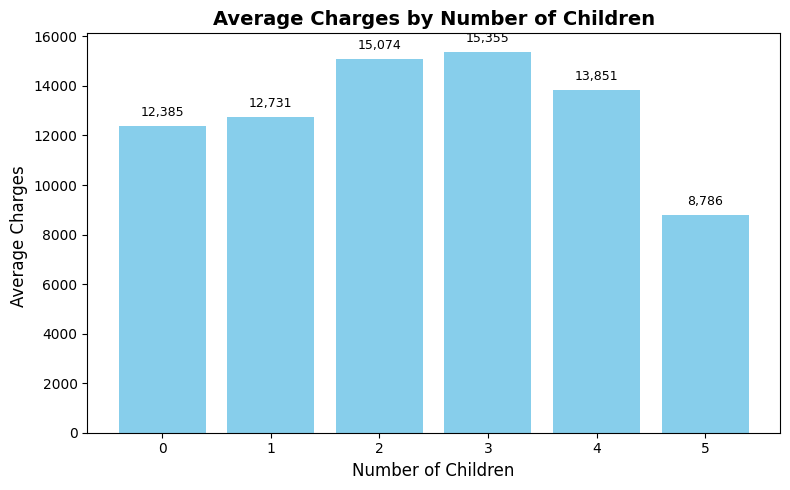

In [75]:
children_avg = df.groupby('children')['charges'].mean()
plt.figure(figsize=(8, 5))
plt.bar(children_avg.index.astype(str), children_avg.values, color='skyblue')
plt.title('Average Charges by Number of Children', fontsize=14, fontweight='bold')
plt.xlabel('Number of Children', fontsize=12)
plt.ylabel('Average Charges ', fontsize=12)
for i, v in enumerate(children_avg.values):
    plt.text(i, v + 400, f'{v:,.0f}', ha='center', fontsize=9)
plt.tight_layout()
plt.show()

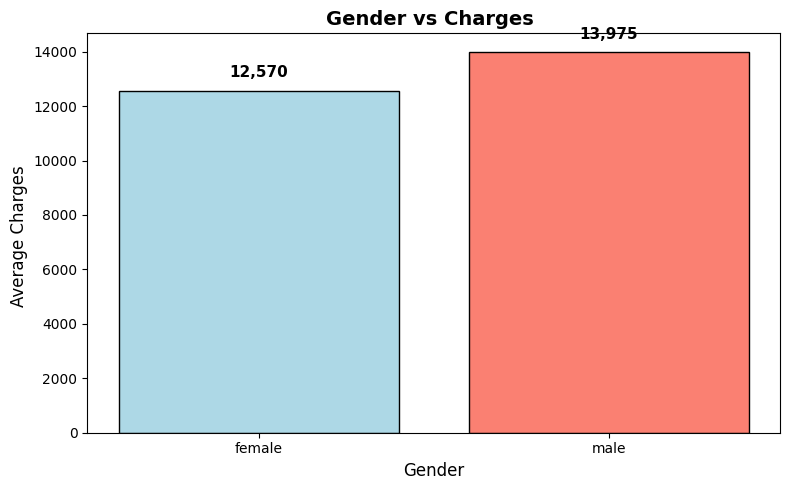

In [76]:
gender_avg = df.groupby('sex')['charges'].mean().sort_values()
plt.figure(figsize=(8, 5))
plt.bar(gender_avg.index, gender_avg.values, color=['lightblue', 'salmon'], edgecolor='black')
plt.title('Gender vs Charges ', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Charges ', fontsize=12)
for i, v in enumerate(gender_avg.values):
    plt.text(i, v + 500, f'{v:,.0f}', ha='center', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

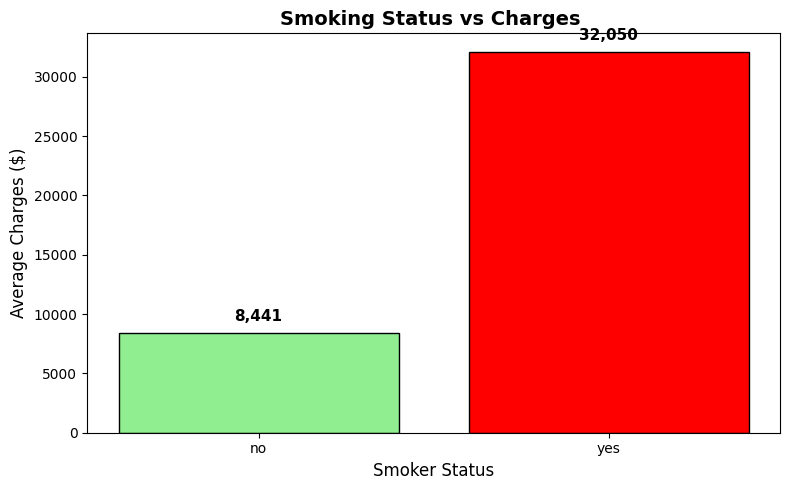

In [77]:
smoker_avg = df.groupby('smoker')['charges'].mean().sort_values()
plt.figure(figsize=(8, 5))
plt.bar(smoker_avg.index, smoker_avg.values, color=['lightgreen', 'red'], edgecolor='black')
plt.title('Smoking Status vs Charges ', fontsize=14, fontweight='bold')
plt.xlabel('Smoker Status', fontsize=12)
plt.ylabel('Average Charges ($)', fontsize=12)
for i, v in enumerate(smoker_avg.values):
    plt.text(i, v + 1000, f'{v:,.0f}', ha='center', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

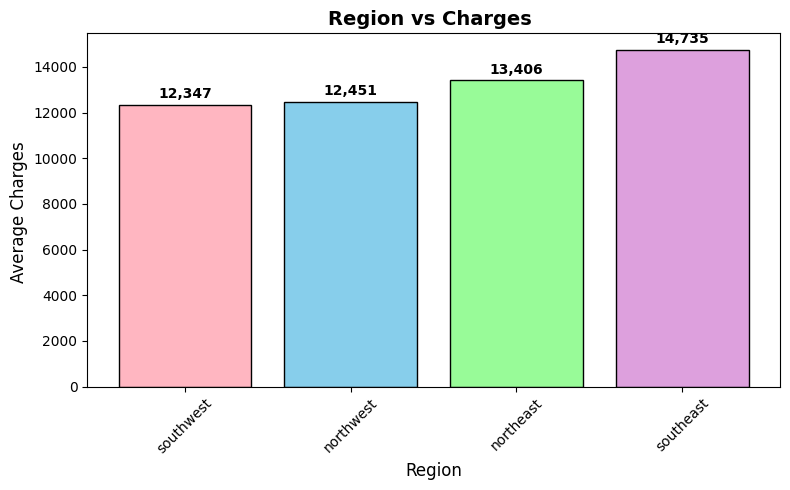

In [78]:
region_avg = df.groupby('region')['charges'].mean().sort_values()
plt.figure(figsize=(8, 5))
plt.bar(region_avg.index, region_avg.values, color=['#FFB6C1', '#87CEEB', '#98FB98', '#DDA0DD'], edgecolor='black')
plt.title('Region vs Charges ', fontsize=14, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Charges ', fontsize=12)
plt.xticks(rotation=45)
for i, v in enumerate(region_avg.values):
    plt.text(i, v + 300, f'{v:,.0f}', ha='center', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

In [79]:
df['log_charges'] = np.log1p(df['charges'])

In [80]:
le=LabelEncoder()
df['smoker'] = le.fit_transform(df['smoker'])
df.head(5)

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,1,southwest,16884.92400,9.734236
1,18,male,33.770,1,0,southeast,1725.55230,7.453882
2,28,male,33.000,3,0,southeast,4449.46200,8.400763
3,33,male,22.705,0,0,northwest,21984.47061,9.998137
4,32,male,28.880,0,0,northwest,3866.85520,8.260455


In [81]:
le=LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df.head(5)

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,0,27.900,0,1,southwest,16884.92400,9.734236
1,18,1,33.770,1,0,southeast,1725.55230,7.453882
2,28,1,33.000,3,0,southeast,4449.46200,8.400763
3,33,1,22.705,0,0,northwest,21984.47061,9.998137
4,32,1,28.880,0,0,northwest,3866.85520,8.260455


In [82]:
df = pd.get_dummies(df, columns=['region'], prefix='region', dtype=int)
df.sample(5)

,age,sex,bmi,children,smoker,charges,log_charges,region_northeast,region_northwest,region_southeast,region_southwest
925,50,1,32.11,2,0,25333.33284,10.139916,1,0,0,0
526,19,0,30.59,2,0,24059.68019,10.088334,0,1,0,0
647,40,0,23.37,3,0,8252.28430,9.018366,1,0,0,0
1326,42,0,32.87,0,0,7050.02130,8.860928,1,0,0,0
210,20,1,33.00,1,0,1980.07000,7.591392,0,0,0,1


In [83]:
from sklearn.model_selection import train_test_split
X = df.drop(['charges','log_charges'], axis=1) 
y = df['log_charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['age', 'bmi', 'children']] = scaler.fit_transform(df[['age', 'bmi', 'children']])

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd


model_scores = {}

# Linear Regression

In [86]:
# 1. Initialize the model
lr_model = LinearRegression()

In [87]:
# 2. Train the model
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [88]:
# 3. Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)


In [91]:
lr_model.score(X_test,X_train)

ValueError: Found input variables with inconsistent numbers of samples: [1002, 335]

In [ ]:
# 4. Evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score

# 4. Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_test_lr = r2_score(y_test, y_pred_lr)
r2_train_lr = r2_score(y_train, lr_model.predict(X_train))



mae_lr = mean_absolute_error(y_test, y_pred_lr)
model_scores['Linear Regression'] = mae_lr
print(f" linear regression test score : {lr_model.score(X_test,y_test)}")
print(f" linear regression train score:  {lr_model.score(X_train, y_train)}")
print(f"Linear Regression MAE: ${mae_lr:,.2f}")

# Decision Tree Regressor

In [ ]:
# 1. Initialize the model
dt_model = DecisionTreeRegressor(random_state=42)

In [ ]:
# 2. Train the model
dt_model.fit(X_train, y_train)

In [ ]:
# 3. Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# 4. Evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score

# 4. Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_test = r2_score(y_test, y_pred_dt)
r2_train = dt_model.score(X_train, y_train)  # Alternatively, use r2_score(y_train, dt_model.predict(X_train))


mae_dt = mean_absolute_error(y_test, y_pred_dt)
model_scores['Decision Tree'] = mae_dt
print(f" linear regression test score : {dt_model.score(X_test,y_test)}")
print(f" linear regression train score:  {dt_model.score(X_train, y_train)}")
print(f"Decision Tree MAE: ${mae_dt:,.2f}")

# Random Forest Regressor

In [ ]:
# 1. Initialize the model (we'll build 100 trees)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# 2. Train the model
rf_model.fit(X_train, y_train)

In [ ]:
# 3. Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# 4. Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
model_scores['Random Forest'] = mae_rf

print(f"Random Forest MAE: ${mae_rf:,.2f}")

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
model_scores['KNN Regressor'] = mae_knn

print(f"KNN Regressor MAE: ${mae_knn:,.2f}")


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Initialize models
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
knn_model = KNeighborsRegressor()
svr_model = SVR()

# Fit models
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_svr = svr_model.predict(X_test)

# Store models and predictions
models = {
    "Linear Regression": (lr_model, y_pred_lr),
    "Decision Tree": (dt_model, y_pred_dt),
    "Random Forest": (rf_model, y_pred_rf),
    "KNN Regressor": (knn_model, y_pred_knn),
    "SVR": (svr_model, y_pred_svr)
}

# Evaluate each model
results = []

for name, (model, y_pred) in models.items():
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    test_score = model.score(X_test, y_test)
    train_score = model.score(X_train, y_train)
    
    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2,
        "Test Score": test_score,
        "Train Score": train_score
    })

# Create and display results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="MAE", ascending=True).reset_index(drop=True)

print("📊 Regression Model Performance Comparison:\n")
print(results_df.round(3))

# Highlight best model
best_model = results_df.loc[0, "Model"]
print(f"\n🏆 Best Performing Model (by MAE): {best_model}")


In [ ]:
import joblib

# Your existing code determines 'best_model_name' and the actual model object
# Let's say your logic selected 'GradientBoostingRegressor' as the variable 'best_model'

# Save the model to a file
joblib.dump(best_model, 'best_healthcare_model.pkl')

print(f"💾 Saved the best model as 'best_healthcare_model.pkl'")